# Using scikit-learn to predict house prices with linear regression

## Data cleansing and exploration

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
houses = pd.read_csv("C:/Users/jdduval1/Desktop/kc_house_data.csv")
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# check for nulls in the data
houses.isnull().sum()
# no nulls in the data! :)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

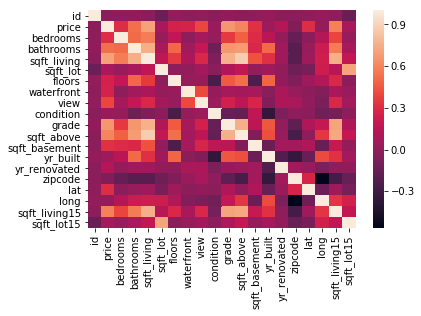

In [4]:
# check to see what (if any) variables are closely correlated
corr = houses.corr()
sns.heatmap(corr)

In [5]:
# another visualization for the same thing
def plot_corr(df, size = 11):
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr) # color code the rectangels by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

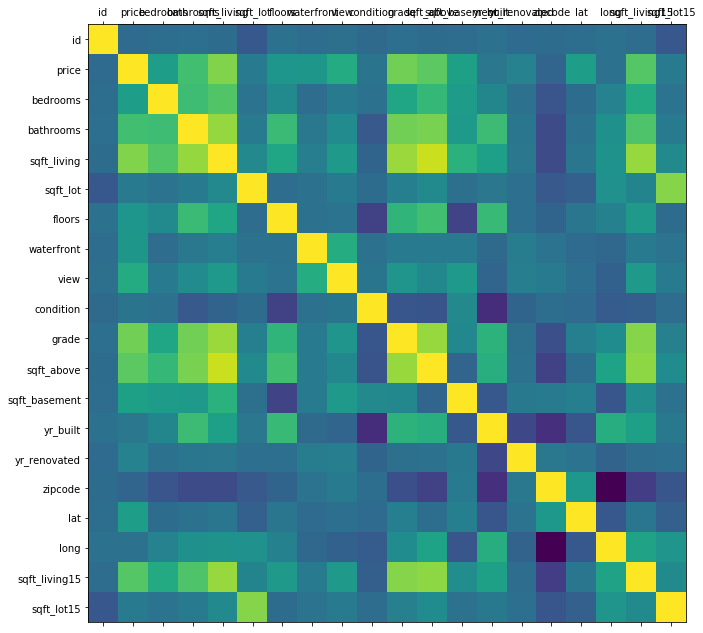

In [6]:
plot_corr(corr)
# these two correlation plots show the correlation between the important y value (price) and sqft_living, grade, sqft_living15
# therefore these three columns have a high influence on price

## Building linear regression model

In [7]:
# linear regression model only using sqft_living as independent variable (x) to predict dependent variable price (y).

### 1. Prepare the data: define predictor (x) and response (y) variables

In [8]:
# create x and y
feature_cols = 'sqft_living'
x = houses[feature_cols] # predictor variable
y = houses.price # response variable

### 2. Split data into train and test
The train/test split consists in randomly making 2 subsets of the data: the training set, used to fit our learning algorithm so it learns how to predict, and the test set which we use to get an idea of how the model would perform with new data. 

In [9]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2) 
# the test set will be 20% of the whole data set

### 3. Fit the model on the training set

In [10]:
x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)


# instantiate, fit
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 4. Print the coefficients

In [11]:
print(linreg.intercept_)
print(linreg.coef_)

[-38657.34222734]
[[278.55772615]]


The intercept (β0) is the value of y when x=0. In this case it would be the price of a house when the sqft_living is 0. (Note it does not always make sense to interpret the intercept). The coefficient of β1 is the change in y divided by change in x (i.e the derivative, the slope of the line of best fit). An increase of 1 square meter in house size is associated with a price increase of $278.55 (number will change for each execution), on average. Note that association doesn’t always imply causation.

### 5. Predict the price of a 1000 sqft_living house using our model

In [12]:
# manually looks like:
price = linreg.intercept_ + 1000 * linreg.coef_
print(round(price[0][0],2))

239900.38


In [15]:
# using the model looks like:
linreg.predict([[1000]])

array([[239900.38392573]])

### 6. Compute the Root Mean Squared Error (RMSE), which is a commonly used metric to evaluate regression models, on the test set

After research, a perfect MSE would be 0, since all outcomes would be directly on top of the plotted line. But this is theoretically impossible for a model to a achieve. Rather, a low number is ideal. In any case, the number corresponds to how much on average the predicted number is from the regression line. Our predicted number below is quite far away. 

In [17]:
mse = mean_squared_error(y_test, linreg.predict(x_test))

np.sqrt(mse) # not a good output here.. The mean_squared_error is very large

275830.65870453

In [18]:
linreg.score(x_test, y_test)

0.5048081109689342

We get a root mean squared error of ($)275,830.66 when predicting a price for a house, which is really high. This is kind of expected since we’re only using one feature in our model, and it could be greatly improved by adding more features such as number of bathrooms or bedrooms. We can also see that we’re omitting relevant variables by looking at the R squared coefficient: 50 percent. This means that our model is only able to explain 50 percent of the variability in house prices.